In [1]:
# Bộ data gốc
# https://www.kaggle.com/c/GiveMeSomeCredit/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, brier_score_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [3]:
# Đọc file dữ liệu train
df = pd.read_csv('D:/FOX AI/Credit/Data Demo Kaggle/cs-training.csv')

# Kiểm tra thông tin dữ liệu
display(df.info())
print('')
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

None

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
# Kiểm tra tỷ lệ thiếu dữ liệu
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
# Xử lý nhanh dữ liệu
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median()) # Xử lý MonthlyIncome: fill median
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(0) # Xử lý NumberOfDependents: fill 0
df.drop(columns=['Unnamed: 0'], inplace=True) # Loại bỏ các biến không cần thiết

In [6]:
# Kiểm tra thông tin dữ liệu
display(df.info())
print('')
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

None

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,5400.0,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [7]:
# Tạm bỏ qua phần chuẩn háo

In [8]:
# Kiểm tra phân phối của cột cần dự báo Y - SeriousDlqin2yrs - chứa nhãn Nhị phân 0/1
dist = df['SeriousDlqin2yrs'].value_counts().sort_index()
percent = df['SeriousDlqin2yrs'].value_counts(normalize=True).sort_index() * 100
summary_df = pd.DataFrame({
    'Giá trị': dist.index,
    'Số lượng': dist.values,
    'Tỷ lệ (%)': percent.values.round(2)
})
display(summary_df)

,Giá trị,Số lượng,Tỷ lệ (%)
0,0,139974,93.32
1,1,10026,6.68


In [9]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu 
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

X_train_and_cal, X_test, y_train_and_cal, y_test = train_test_split(
    X, y,
    test_size = 0.25,                    # Lấy ra tập test là 25% trước
    stratify = y,                       # giữ nguyên tỷ lệ nhãn
    random_state = 42        
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_and_cal, y_train_and_cal, 
    test_size = 0.2,                    # Tập train chính 60% - tập calibration 15% (được chia từ 80/20 từ tập 75% tổng)
    stratify = y_train_and_cal,
    random_state = 42
)

In [10]:
# Kiểm tra shape của 3 tập 
counts = [len(X_train), len(X_cal), len(X_test)]
percent = [round(x / len(df) * 100, 2) for x in counts]

summary_df = pd.DataFrame({
    'Tập dữ liệu': ['X_train', 'X_cal', 'X_test'],
    'Số dòng': counts,
    'Tỷ lệ (%)': percent
})
display(summary_df)

,Tập dữ liệu,Số dòng,Tỷ lệ (%)
0,X_train,90000,60.0
1,X_cal,22500,15.0
2,X_test,37500,25.0


In [11]:
# Chuẩn hóa dữ liệu cho mô hình Logis
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_cal_scaled   = scaler.transform(X_cal)
X_test_scaled  = scaler.transform(X_test)

In [12]:
# Huấn luyện mô hình 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Khởi tạo mô hình
logit_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Huấn luyện
logit_model.fit(X_train_scaled, y_train) 
rf_model.fit(X_train, y_train)            # Mô hình cây không cần dữ liệu chuẩn hóa
xgb_model.fit(X_train, y_train)           # Mô hình cây không cần dữ liệu chuẩn hóa

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [13]:
from sklearn.metrics import roc_auc_score

# Tính AUC
logit_auc = roc_auc_score(y_test, logit_model.predict_proba(X_test_scaled)[:, 1])
rf_auc    = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc   = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Tính Gini
logit_gini = 2 * logit_auc - 1
rf_gini    = 2 * rf_auc - 1
xgb_gini   = 2 * xgb_auc - 1

# Tạo DataFrame kết quả
auc_df = pd.DataFrame({
    'Mô hình': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'AUC': [logit_auc, rf_auc, xgb_auc],
    'Gini': [logit_gini, rf_gini, xgb_gini]
})
display(auc_df.round(3))

,Mô hình,AUC,Gini
0,Logistic Regression,0.799,0.598
1,Random Forest,0.839,0.678
2,XGBoost,0.858,0.716


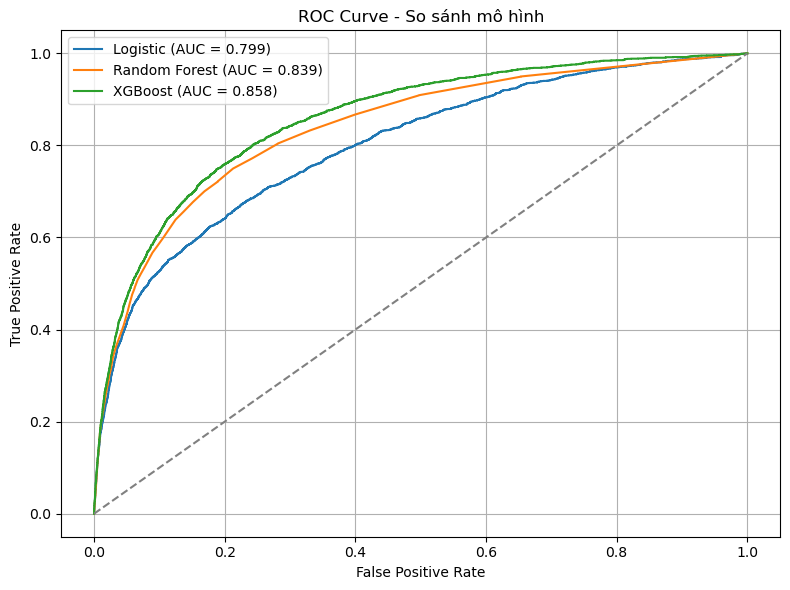

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Lấy xác suất class 1
logit_probs = logit_model.predict_proba(X_test_scaled)[:, 1]
rf_probs    = rf_model.predict_proba(X_test)[:, 1]
xgb_probs   = xgb_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr_logit, tpr_logit, _ = roc_curve(y_test, logit_probs)
fpr_rf, tpr_rf, _       = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _     = roc_curve(y_test, xgb_probs)

# Tính AUC
logit_auc = roc_auc_score(y_test, logit_probs)
rf_auc    = roc_auc_score(y_test, rf_probs)
xgb_auc   = roc_auc_score(y_test, xgb_probs)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, label=f'Logistic (AUC = {logit_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - So sánh mô hình')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Dự đoán nhãn
model_preds = {
    'Logistic Regression': logit_model.predict(X_test_scaled),
    'Random Forest': rf_model.predict(X_test),
    'XGBoost': xgb_model.predict(X_test)
}

# Tạo bảng metrics đánh giá
metrics = []
for name, y_pred in model_preds.items():
    metrics.append({
        'Mô hình': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Tạo DataFrame và hiển thị
metrics_df = pd.DataFrame(metrics)
display(metrics_df.round(2))

,Mô hình,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.77,0.18,0.67,0.28
1,Random Forest,0.94,0.58,0.16,0.25
2,XGBoost,0.94,0.57,0.20,0.30


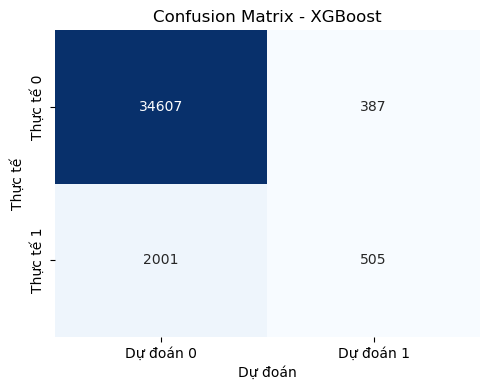

In [16]:
from sklearn.metrics import confusion_matrix

# Dự đoán nhãn
xgb_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dự đoán 0', 'Dự đoán 1'],
            yticklabels=['Thực tế 0', 'Thực tế 1'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

In [17]:
# Gọi lại mô hình tốt nhất đã train và đặt tên riêng - clf ("classifier đã chốt")
clf = xgb_model.fit(X_train, y_train) 

# Tìm khoảng sai số phía - q - được cho phép bởi độ tin cậy
prob_calib = clf.predict_proba(X_cal)[:, 1]                          # Dự báo xác suất class cho tập cal
nonconformity = 1 - np.where(y_cal == 1, prob_calib, 1 - prob_calib) # Sai số của mô hình - nonconformity scores: 1 - prob of true class

alpha = 0.05                          
q = np.quantile(nonconformity, 1 - alpha)                            # Sai số q là phân vị (= độ tin cậy) của phân phối nonconformity              

# Tạo khoảng dự đoán cho tập test
prob_test = clf.predict_proba(X_test)[:, 1]                          # Dự báo xác suất từng class 1 cho tập test             
prob_lower = np.clip(prob_test - q, 0, 1)                            # Cộng trừ q - "sai số cho phép" vào 2 phía tạo khoảng tin cậy
prob_upper = np.clip(prob_test + q, 0, 1)                            # Cộng trừ q - "sai số cho phép" vào 2 phía tạo khoảng tin cậy

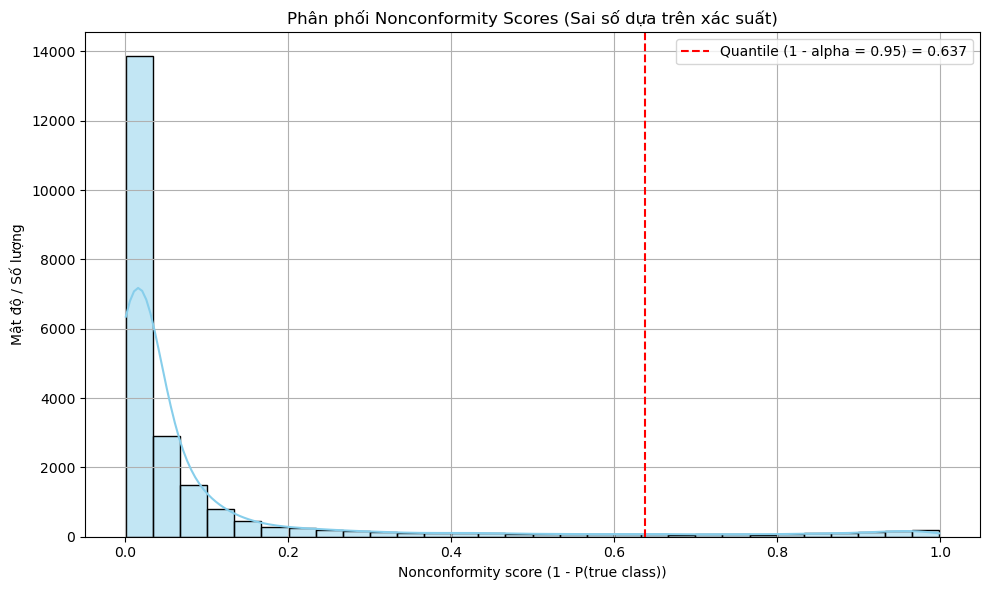

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(nonconformity, kde=True, bins=30, color="skyblue", edgecolor="black")

plt.axvline(q, color="red", linestyle="--", label=f"Quantile (1 - alpha = {1 - alpha:.2f}) = {q:.3f}")
plt.title("Phân phối Nonconformity Scores (Sai số dựa trên xác suất)")
plt.xlabel("Nonconformity score (1 - P(true class))")
plt.ylabel("Mật độ / Số lượng")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
interval_df = pd.DataFrame({
    'y_test': y_test.values,
    'Prob Lower': np.round(prob_lower, 2),
    'Prob Class 1': np.round(prob_test, 2),
    'Prob Upper': np.round(prob_upper, 2),
    
})
display(interval_df.head(5))

,y_test,Prob Lower,Prob Class 1,Prob Upper
0,0,0.0,0.07,0.71
1,0,0.0,0.01,0.64
2,0,0.0,0.04,0.68
3,0,0.0,0.00,0.64
4,0,0.0,0.00,0.64


In [20]:
from mapie.classification import MapieClassifier
from mapie.metrics import (classification_coverage_score,
                           classification_mean_width_score)

# Mapie Classfier để train mô hình gốc trên tập cal để dự báo Prediction Set cho tập test 
mapie_score = MapieClassifier(estimator=clf, cv="prefit", method="lac")
mapie_score.fit(X_cal, y_cal)
_, y_pred_set = mapie_score.predict(X_test, alpha = alpha)

In [21]:
# Thêm kết quả pred set vào df ở trên
interval_df['Set'] = [set(np.where(row)[0]) for row in y_pred_set[:, :, 0]]
interval_df.head(20)

,y_test,Prob Lower,Prob Class 1,Prob Upper,Set
0,0,0.0,0.07,0.71,{0}
1,0,0.0,0.01,0.64,{0}
2,0,0.0,0.04,0.68,{0}
3,0,0.0,0.00,0.64,{0}
4,0,0.0,0.00,0.64,{0}
5,1,0.0,0.11,0.74,{0}
6,0,0.0,0.01,0.65,{0}
7,0,0.0,0.00,0.64,{0}
8,0,0.0,0.07,0.71,{0}
9,0,0.0,0.08,0.72,{0}


In [22]:
alpha2 = np.arange(0.005, 0.105, 0.005)
_, y_ps_score2 = mapie_score.predict(X_test, alpha=alpha2)

coverages_score = [
    classification_coverage_score(y_test, y_ps_score2[:, :, i])     
    for i, _ in enumerate(alpha2)                                                        
]

widths_score = [
    classification_mean_width_score(y_ps_score2[:, :, i])          
    for i, _ in enumerate(alpha2)                                 
]

results = pd.DataFrame({
    'alpha': alpha2,
    'coverages': np.round(coverages_score, 3),
    'widths': np.round(widths_score, 3)
})
results.head(21)

,alpha,coverages,widths
0,0.005,0.995,1.507
1,0.010,0.990,1.346
2,0.015,0.985,1.256
3,0.020,0.980,1.189
4,0.025,0.974,1.137
5,0.030,0.969,1.104
6,0.035,0.964,1.079
7,0.040,0.960,1.062
8,0.045,0.954,1.044
9,0.050,0.950,1.032


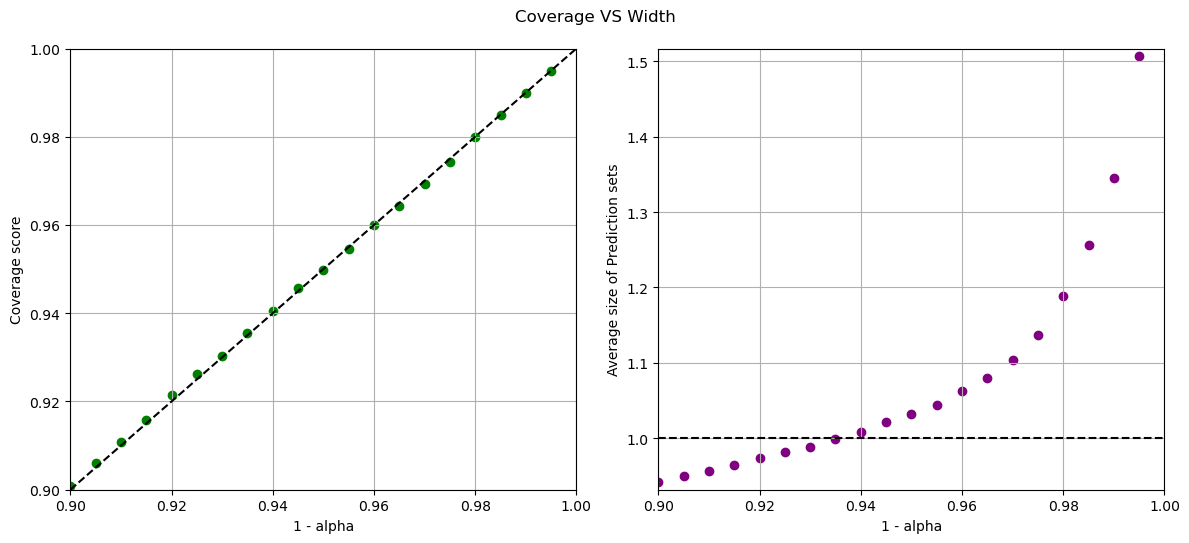

In [23]:
def plot_coverages_widths(alpha, coverage, width, method):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))

    # Plot Coverage
    x_values = 1 - alpha
    axs[0].scatter(x_values, coverage, color='green')
    axs[0].plot([0.9, 1], [0.9, 1], color='black', linestyle='--')
    axs[0].set_xlim(0.9, 1)
    axs[0].set_ylim(0.9, 1)
    axs[0].set_xlabel("1 - alpha")
    axs[0].set_ylabel("Coverage score")
    axs[0].grid(True)

    # Plot Width
    axs[1].scatter(x_values, width, color='purple')
    axs[1].axhline(y=1, color='black', linestyle='--')
    axs[1].set_xlim(0.9, 1)
    axs[1].set_ylim(min(width)-(0.01), max(width)+(0.01) )
    axs[1].set_xlabel("1 - alpha")
    axs[1].set_ylabel("Average size of Prediction sets")
    axs[1].grid(True)
    
    plt.suptitle(f"Coverage VS Width")
    plt.tight_layout()
    plt.show()

plot_coverages_widths(alpha2, coverages_score, widths_score, "method = 'lac'")

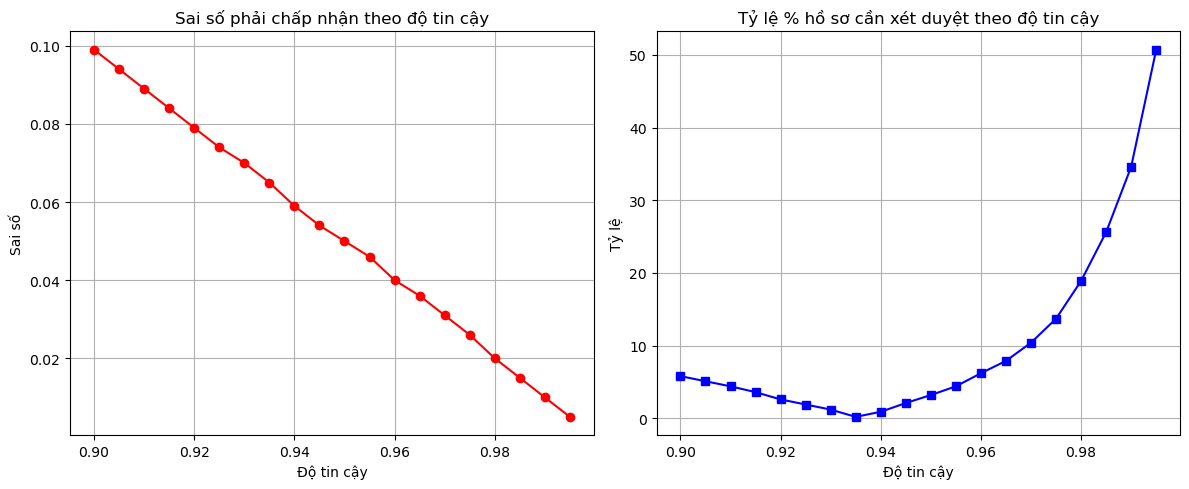

In [24]:
# Chuẩn bị dữ liệu
results['1 - alpha'] = 1 - results['alpha']
results['1 - coverage'] = 1 - results['coverages']
results['review_rate_from_width_%'] = np.abs(1 - results['widths']) * 100

# Tạo figure 2 subplot ngang nhau
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Đồ thị sai số phải chấp nhận
axs[0].plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red')
axs[0].set_xlabel('Độ tin cậy')
axs[0].set_ylabel('Sai số')
axs[0].set_title('Sai số phải chấp nhận theo độ tin cậy')
axs[0].grid(True)

# Subplot 2: Đồ thị tỷ lệ hồ sơ cần xét duyệt
axs[1].plot(results['1 - alpha'], results['review_rate_from_width_%'], marker='s', color='blue')
axs[1].set_xlabel('Độ tin cậy')
axs[1].set_ylabel('Tỷ lệ')
axs[1].set_title('Tỷ lệ % hồ sơ cần xét duyệt theo độ tin cậy')
axs[1].grid(True)

# Ghép lại và hiển thị
plt.tight_layout()
plt.show()

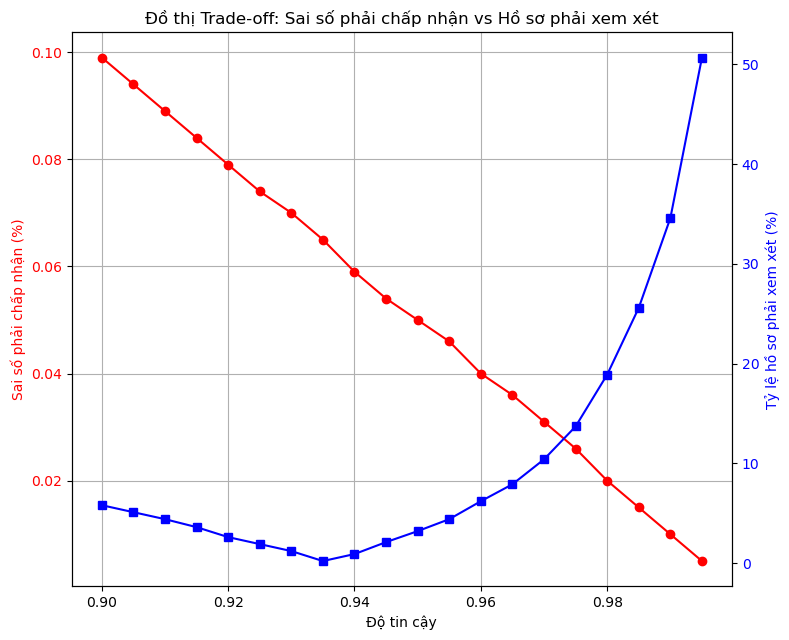

In [25]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 6.5))

# Trục Y bên trái (Sai số)
ax1.plot(results['1 - alpha'], results['1 - coverage'], marker='o', color='red', label='Sai số (1 - coverage)')
ax1.set_xlabel("Độ tin cậy")
ax1.set_ylabel("Sai số phải chấp nhận (%)", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True)

# Tạo trục Y bên phải
ax2 = ax1.twinx()

# Trục Y bên phải (Hồ sơ cần xét)
ax2.plot(results['1 - alpha'], results['review_rate_from_width_%'], marker='s', color='blue', label='Hồ sơ phải xem xét (%)')
ax2.set_ylabel("Tỷ lệ hồ sơ phải xem xét (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Đồ thị Trade-off: Sai số phải chấp nhận vs Hồ sơ phải xem xét")
fig.tight_layout()
plt.show()